# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Data

In [3]:
train = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/ghouls/train.csv")
test = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/ghouls/test.csv")

print("Shape of train: {}".format(train.shape))
print("Shape of test: {}".format(test.shape))

Shape of train: (371, 7)
Shape of test: (529, 6)


In [4]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


# Helper function

In [22]:
def pretty_bar(data, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(12,8))
    sns.barplot(plotting_data.values, plotting_data.index)
    for i, v in enumerate(plotting_data.values):
        plt.text(0.8,i,v,color='k',fontsize=19)
    ylabel != None and plt.ylabel(ylabel, fontsize=24)
    xlabel != None and plt.xlabel(xlabel, fontsize=24)
    title != None and plt.title(title, fontsize=16)
    plt.show()

# Data Exploration

# Different types of monsters

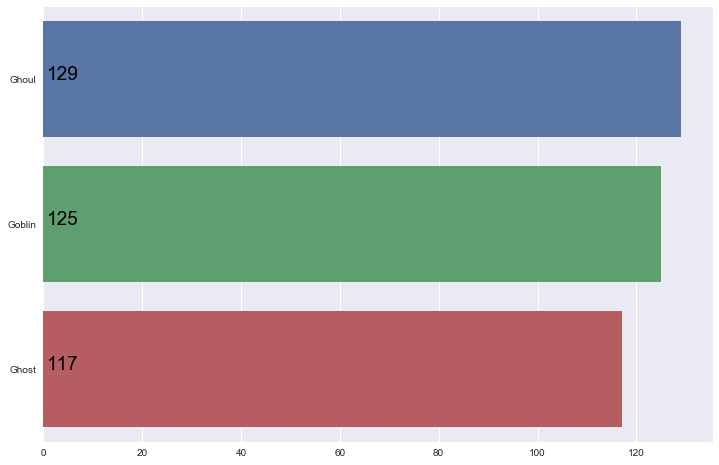

In [23]:
plotting_data = train.type.value_counts()
pretty_bar(plotting_data)

### Different colors of monsters

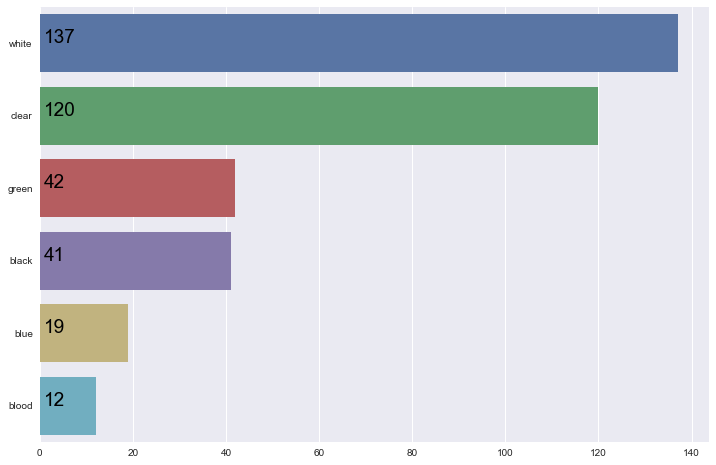

In [25]:
sns.set_context(font_scale=2)
plotting_data = train.color.value_counts()
pretty_bar(plotting_data)

### Correlation map

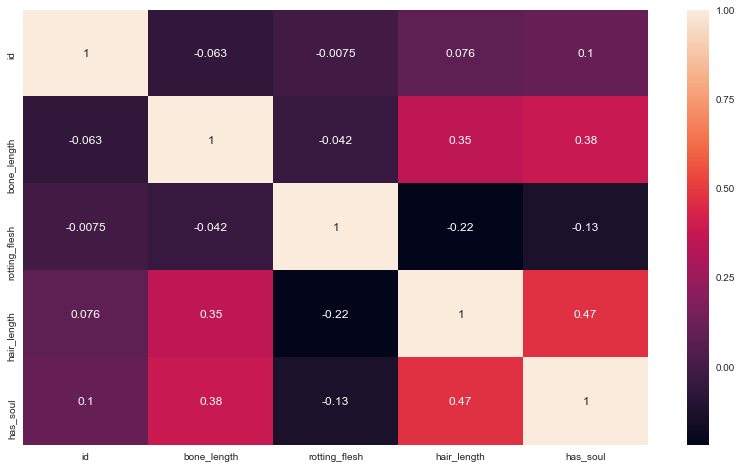

In [82]:
plt.figure(figsize=(14, 8))
f = train.corr()
_ = sns.heatmap(f, annot=True)

### Variable distribution

It looks like they're all gaussian without much skew

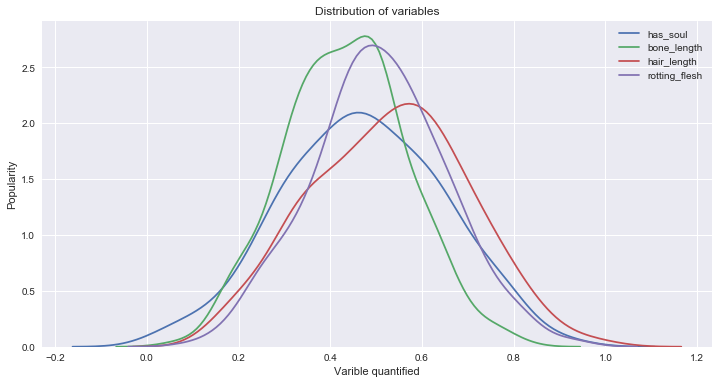

In [7]:
fig = plt.figure(figsize=(12, 6))

sns.kdeplot(train.has_soul)
sns.kdeplot(train.bone_length)
sns.kdeplot(train.hair_length)
sns.kdeplot(train.rotting_flesh)

plt.title("Distribution of variables")
plt.ylabel("Popularity")
_ = plt.xlabel("Varible quantified")

# Data skew

In [8]:
from scipy.stats import skew

skews = list()
for col in ["bone_length", "rotting_flesh", "hair_length", "has_soul"]:
    skews.append((col, skew(train[col])))

pd.DataFrame(skews, columns=["attribute", "skew"])

,attribute,skew
0,bone_length,0.055080
1,rotting_flesh,0.054191
2,hair_length,-0.015399
3,has_soul,-0.034310


# Pairplots of the table's different variables

David de la Iglesia Castro introduced me to this

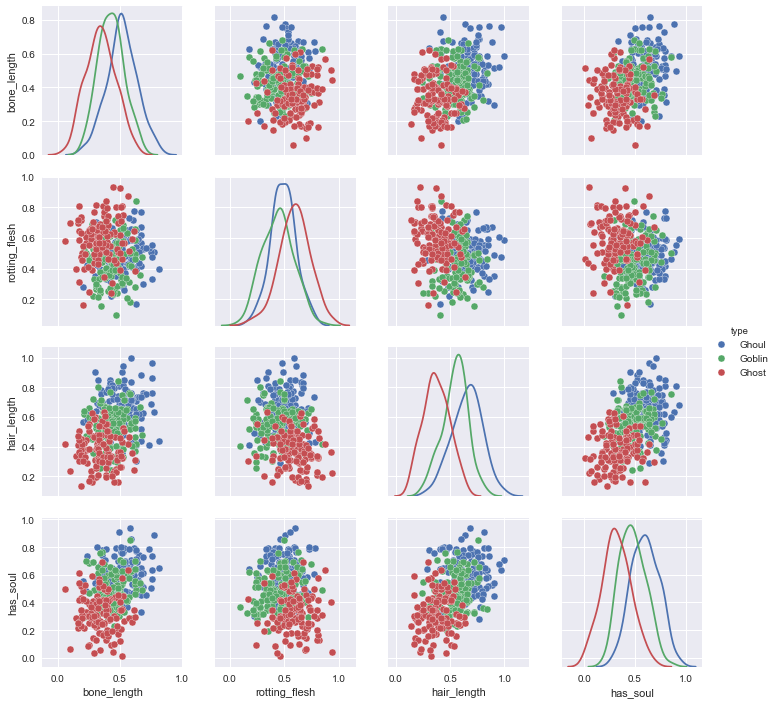

In [9]:
_ = sns.pairplot(train.drop("id",axis=1), hue="type", diag_kind="kde")

# Violin plots

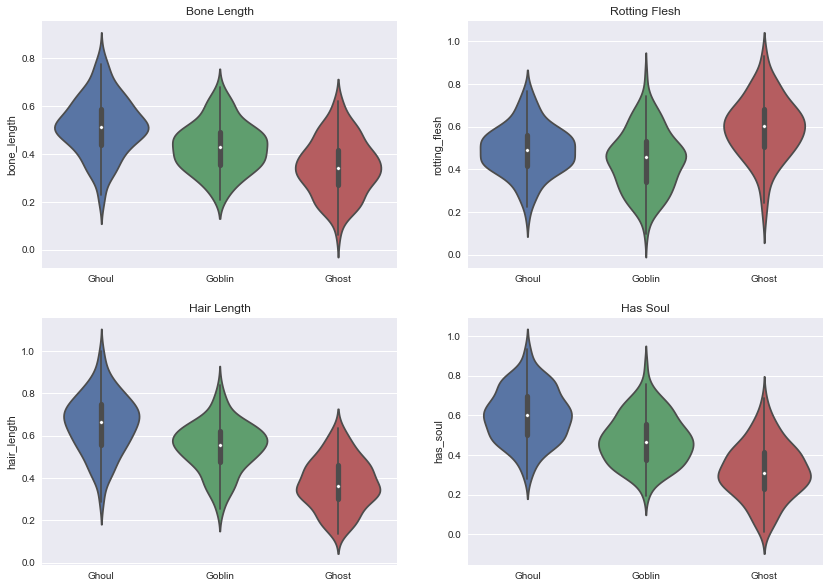

In [37]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))

sns.violinplot(train.type, train.bone_length, ax=axarr[0][0]).set(title="Bone Length", xlabel="")
sns.violinplot(train.type, train.rotting_flesh, ax=axarr[0][1]).set(title="Rotting Flesh", xlabel="")
sns.violinplot(train.type, train.hair_length, ax=axarr[1][0]).set(title="Hair Length", xlabel="")
_ = sns.violinplot(train.type, train.has_soul, ax=axarr[1][1]).set(title="Has Soul", xlabel="")

### Boxplots

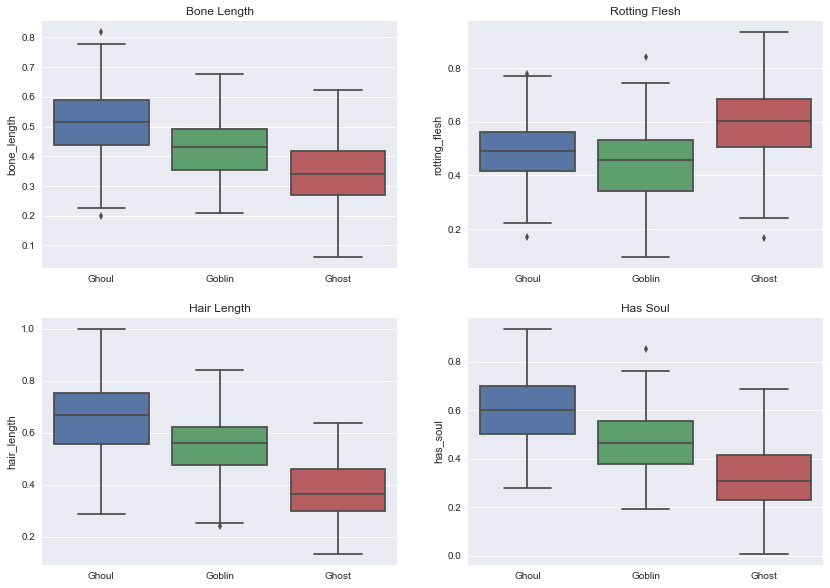

In [42]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(train.type, train.bone_length, ax=axarr[0][0]).set(title="Bone Length", xlabel="")
sns.boxplot(train.type, train.rotting_flesh, ax=axarr[0][1]).set(title="Rotting Flesh", xlabel="")
sns.boxplot(train.type, train.hair_length, ax=axarr[1][0]).set(title="Hair Length", xlabel="")
_ = sns.boxplot(train.type, train.has_soul, ax=axarr[1][1]).set(title="Has Soul", xlabel="")

### lvplot

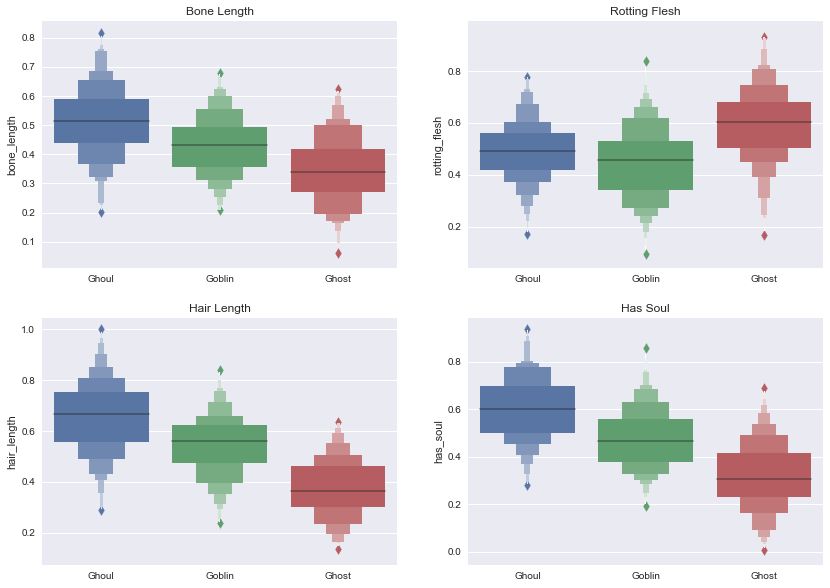

In [50]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))

sns.lvplot(train.type, train.bone_length, ax=axarr[0][0]).set(title="Bone Length", xlabel="")
sns.lvplot(train.type, train.rotting_flesh, ax=axarr[0][1]).set(title="Rotting Flesh", xlabel="")
sns.lvplot(train.type, train.hair_length, ax=axarr[1][0]).set(title="Hair Length", xlabel="")
_ = sns.lvplot(train.type, train.has_soul, ax=axarr[1][1]).set(title="Has Soul", xlabel="")

### Swarm Plot

This plot somes up the conclusions of the plots above

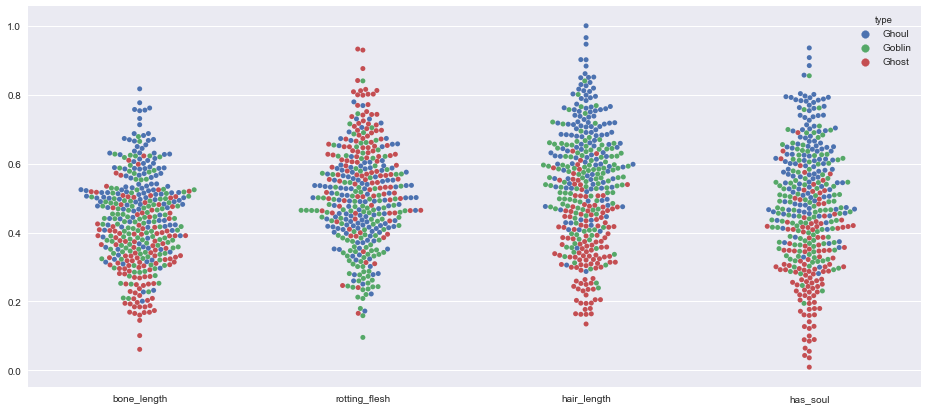

In [86]:
plt.figure(figsize=(16, 7))
melted_data = pd.melt(train.drop(["id", "color"],axis=1), "type", var_name="measurements")
_ = sns.swarmplot(x="measurements", y="value", hue="type", data=melted_data).set(xlabel="", ylabel="")

### Swarm plot, but for color

This is an excellent example of when a visualization gives no information

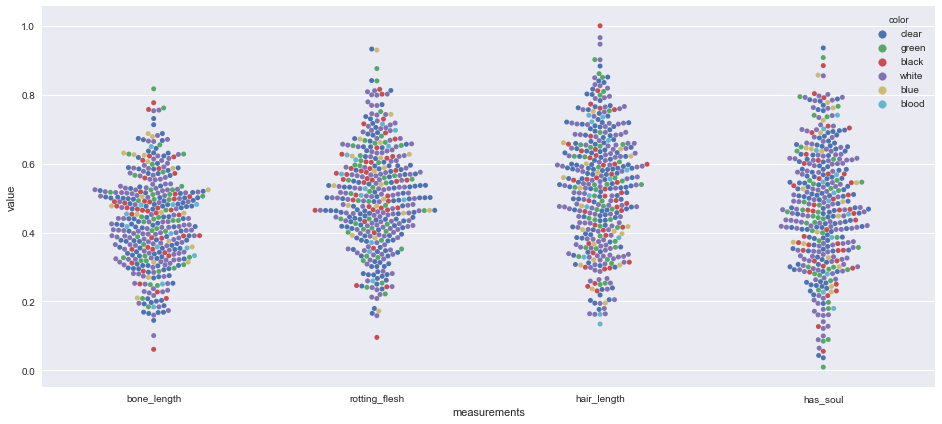

In [72]:
plt.figure(figsize=(16, 7))
melted_data = pd.melt(train.drop(["id", "type"],axis=1), "color", var_name="measurements")
_ = sns.swarmplot(x="measurements", y="value", hue="color", data=melted_data)

### Factorplot of type and color

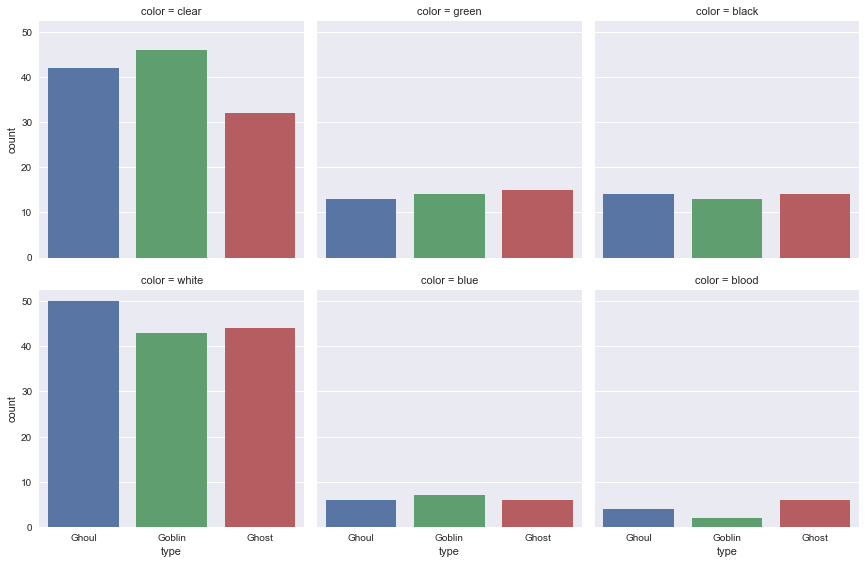

In [80]:
_ = sns.factorplot("type", col="color", col_wrap=3, data=train, kind="count")